# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble            import RandomForestClassifier
from sklearn.tree                import DecisionTreeClassifier
from sklearn.neighbors           import KNeighborsClassifier
from sklearn.model_selection     import train_test_split
from sklearn.metrics             import classification_report, accuracy_score, recall_score, confusion_matrix
from yellowbrick.classifier      import ConfusionMatrix

import pickle

# LOADING DATA

In [2]:
df = pd.read_csv("data_unbalanced_preprocessed.csv")

In [3]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING PERSON
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# SPLIT DATA

In [4]:
x = df.drop(['DEFAULTING PERSON'], axis = 1)
y = df['DEFAULTING PERSON'].copy()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [6]:
x_train.shape, y_train.shape

((22500, 23), (22500,))

In [7]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

# MACHINE LEARNING

In [8]:
version1_accuracy = [] # version1 = [tree, random_forest, knn] for accuracy
version1_recall = [] # version1 = [tree, random_forest, knn] for recall

## Decision Tree

In [9]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
v1_tree = tree.predict(x_test)

In [10]:
version1_accuracy.append( accuracy_score(y_test, v1_tree) )
version1_recall.append( recall_score(y_test, v1_tree) )

In [11]:
version1_accuracy, version1_recall

([0.7336], [0.40931372549019607])

In [12]:
print(classification_report(y_test, v1_tree))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5868
           1       0.39      0.41      0.40      1632

    accuracy                           0.73      7500
   macro avg       0.61      0.62      0.61      7500
weighted avg       0.74      0.73      0.74      7500



In [13]:
cf_tree = confusion_matrix(y_test, v1_tree)

In [14]:
# sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap = 'Blues');

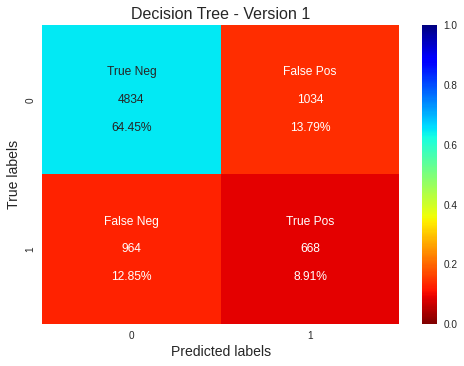

In [15]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 1", fontsize = 16)

plt.show()

## Random Forest

In [16]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
v1_rf = rf.predict(x_test)

In [17]:
version1_accuracy.append( accuracy_score(y_test, v1_rf) )
version1_recall.append( recall_score(y_test, v1_rf) )

In [18]:
version1_accuracy[1], version1_recall[1]

(0.8190666666666667, 0.36825980392156865)

In [19]:
print(classification_report(y_test, v1_rf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5868
           1       0.65      0.37      0.47      1632

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [20]:
cf_rf = confusion_matrix(y_test, v1_rf)

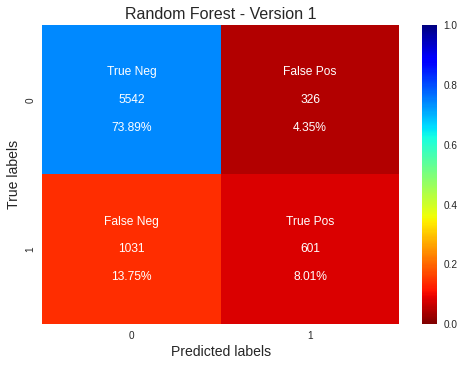

In [21]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 1", fontsize = 16)

plt.show()

## Knn

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
v1_knn = knn.predict(x_test)

In [23]:
version1_accuracy.append( accuracy_score(y_test, v1_knn) )
version1_recall.append( recall_score(y_test, v1_knn) )

In [24]:
version1_accuracy[2], version1_recall[2]

(0.7621333333333333, 0.19424019607843138)

In [25]:
print(classification_report(y_test, v1_knn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5868
           1       0.40      0.19      0.26      1632

    accuracy                           0.76      7500
   macro avg       0.60      0.56      0.56      7500
weighted avg       0.72      0.76      0.73      7500



In [26]:
cf_knn = confusion_matrix(y_test, v1_knn)

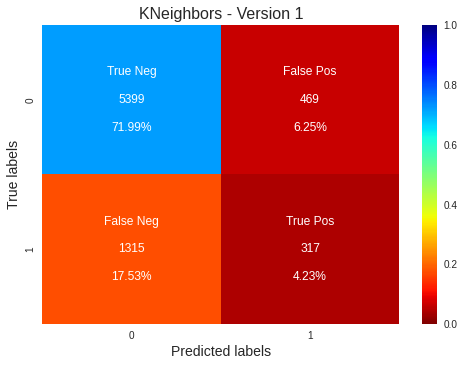

In [27]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 1", fontsize = 16)

plt.show()

## Storaging and saving The results

In [46]:
algorithms = ['Decision Tree', 'Random Forest', 'KNN']

accuracy_dict = {"Version 1": version1_accuracy }
recall_dict = {" Version 1": version1_recall}

accuracy = pd.DataFrame.from_dict(algorithms)
accuracy.rename(columns={0: 'Algorithms'}, inplace=True)
accuracy['Version 1'] = version1_accuracy

accuracy.to_csv("accuracy_versions.csv", index=None)

recall = pd.DataFrame.from_dict(algorithms)
recall.rename(columns={0: 'Algorithms'}, inplace=True)
recall['Version 1'] = version1_recall

recall.to_csv("recall_versions.csv", index = None)

In [47]:
accuracy

,Algorithms,Version 1
0,Decision Tree,0.733600
1,Random Forest,0.819067
2,KNN,0.762133


In [48]:
recall

,Algorithms,Version 1
0,Decision Tree,0.409314
1,Random Forest,0.368260
2,KNN,0.194240
